## 1. 서포트 벡터 머신 (SVM) 모델링

In [35]:
# 데이터 분석과 모델링에 필요한 라이브러리 임포트
import pandas as pd
import numpy as np

# 데이터셋 불러오기
df = pd.read_csv('../../train_preprocessed.csv')

# 데이터 프레임 크기와 앞부분 확인
print(df.shape)
df.head()


(165034, 23)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,...,age_tenure_ratio,sleeping_wealth,minimal_user,economic_maturity,churn_risk_score,relationship_value,activity_per_year,financial_engagement,prime_age,wealth_per_product
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,True,...,8.250000,0,0,2993924.505,1,544349.91,1.5,2,0,90724.985
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,True,...,16.500000,0,0,816807.750,0,49503.50,0.5,3,0,24751.750
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,True,...,3.636364,0,0,3697333.800,1,1848666.90,5.0,2,1,92433.345
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,True,...,11.333333,0,1,3968538.140,0,169121.76,2.0,3,0,233443.420
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,True,...,5.500000,0,0,248635.695,0,75344.15,2.5,3,0,7534.415


In [36]:
# 데이터 기본 정보 출력 (데이터 타입, 결측치 여부 확인)
df.info()

# 타깃 변수와 특징 변수 분리
# 예를 들어, 'Exited' 컬럼이 고객 이탈 여부 타깃이라고 가정
X = df.drop('Exited', axis=1)  # 입력 변수들
y = df['Exited']               # 타깃 변수

# 분리 결과 확인
print("특징 변수(X) 형태:", X.shape)
print("타깃 변수(y) 형태:", y.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   CreditScore           165034 non-null  int64  
 1   Age                   165034 non-null  float64
 2   Tenure                165034 non-null  int64  
 3   Balance               165034 non-null  float64
 4   NumOfProducts         165034 non-null  int64  
 5   HasCrCard             165034 non-null  float64
 6   IsActiveMember        165034 non-null  float64
 7   EstimatedSalary       165034 non-null  float64
 8   Exited                165034 non-null  int64  
 9   Gender_Male           165034 non-null  bool   
 10  Geography_Germany     165034 non-null  bool   
 11  Geography_Spain       165034 non-null  bool   
 12  senior                165034 non-null  int64  
 13  age_tenure_ratio      165034 non-null  float64
 14  sleeping_wealth       165034 non-null  int64  
 15  

In [37]:
from sklearn.model_selection import train_test_split

# 데이터를 8:2 비율로 학습용과 테스트용으로 나누기
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 분리된 데이터 크기 출력
print("학습용 데이터:", X_train.shape)
print("테스트용 데이터:", X_test.shape)


학습용 데이터: (132027, 22)
테스트용 데이터: (33007, 22)


In [38]:
from sklearn.preprocessing import StandardScaler

# 스케일러 객체 생성
scaler = StandardScaler()

# 학습 데이터 스케일링 - fit과 transform 동시에
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터는 학습 데이터 기준으로 transform만 적용
X_test_scaled = scaler.transform(X_test)

# 변환된 데이터 크기 확인
print("스케일링된 학습 데이터 형태:", X_train_scaled.shape)
print("스케일링된 테스트 데이터 형태:", X_test_scaled.shape)


스케일링된 학습 데이터 형태: (132027, 22)
스케일링된 테스트 데이터 형태: (33007, 22)


In [39]:
from sklearn.svm import SVC

# SVM 모델 객체 생성 (기본 커널: RBF)
svm_model = SVC(probability=True, random_state=42)

# 학습이 너무 느려서 데이터 줄여서 학습 실험 (10%)
X_small = X_train_scaled[:10000]
y_small = y_train[:10000]
svm_model.fit(X_small, y_small)

print("SVM 모델 학습 완료!")



SVM 모델 학습 완료!


In [40]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 테스트 데이터에 대한 예측
y_pred = svm_model.predict(X_test_scaled)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"테스트 데이터 정확도: {accuracy:.4f}")

# 혼동 행렬 출력
conf_mat = confusion_matrix(y_test, y_pred)
print("혼동 행렬:\n", conf_mat)

# 자세한 분류 보고서 출력 (정밀도, 재현율, F1 점수 포함)
report = classification_report(y_test, y_pred)
print("분류 보고서:\n", report)


테스트 데이터 정확도: 0.8590
혼동 행렬:
 [[24806  1217]
 [ 3436  3548]]
분류 보고서:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91     26023
           1       0.74      0.51      0.60      6984

    accuracy                           0.86     33007
   macro avg       0.81      0.73      0.76     33007
weighted avg       0.85      0.86      0.85     33007



In [41]:
from sklearn.model_selection import GridSearchCV

# 튜닝할 하이퍼파라미터 후보 설정
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']  # 기본 RBF 커널 사용
}

# GridSearchCV 객체 생성 (5겹 교차검증)
grid = GridSearchCV(SVC(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)

# 학습 데이터로 하이퍼파라미터 탐색
grid.fit(X_small, y_small)

# 최적의 파라미터와 최고 점수 출력
print("최적 파라미터:", grid.best_params_)
print("최고 교차검증 점수:", grid.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
최적 파라미터: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
최고 교차검증 점수: 0.8606


In [42]:
best_svm = grid.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       0.88      0.95      0.91     26023
           1       0.74      0.52      0.61      6984

    accuracy                           0.86     33007
   macro avg       0.81      0.73      0.76     33007
weighted avg       0.85      0.86      0.85     33007



SVM ROC AUC: 0.8275


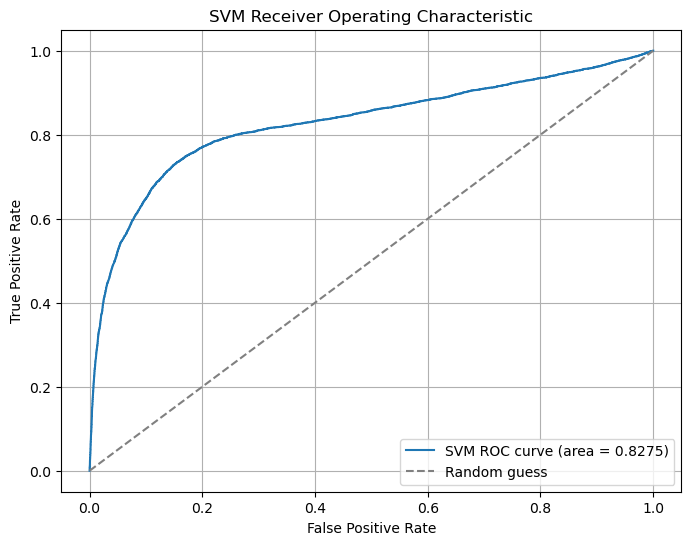

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# SVM은 predict_proba 지원 안 하는 경우가 있음 → probability=True 옵션으로 모델 생성 필요
# 모델 생성 시 probability=True로 설정했는지 확인 필요!

# SVM 확률 예측 (probability=True로 학습한 경우만 가능)
y_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# ROC 계산
fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
roc_auc = auc(fpr, tpr)
print(f"SVM ROC AUC: {roc_auc:.4f}")

# ROC Curve 그리기
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'SVM ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## 2. 다중 신경망 (MLP) 모델링

In [78]:
import pandas as pd
import numpy as np

# 데이터 불러오기
df = pd.read_csv('../../train_preprocessed.csv')

# 데이터 크기와 일부 확인
print(df.shape)
df.head()


(165034, 23)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,...,age_tenure_ratio,sleeping_wealth,minimal_user,economic_maturity,churn_risk_score,relationship_value,activity_per_year,financial_engagement,prime_age,wealth_per_product
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,True,...,8.250000,0,0,2993924.505,1,544349.91,1.5,2,0,90724.985
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,True,...,16.500000,0,0,816807.750,0,49503.50,0.5,3,0,24751.750
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,True,...,3.636364,0,0,3697333.800,1,1848666.90,5.0,2,1,92433.345
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,True,...,11.333333,0,1,3968538.140,0,169121.76,2.0,3,0,233443.420
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,True,...,5.500000,0,0,248635.695,0,75344.15,2.5,3,0,7534.415


In [79]:
X = df.drop('Exited', axis=1)
y = df['Exited']

print("특징 변수 형태:", X.shape)
print("타깃 변수 형태:", y.shape)


특징 변수 형태: (165034, 22)
타깃 변수 형태: (165034,)


In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("학습 데이터 크기:", X_train.shape)
print("테스트 데이터 크기:", X_test.shape)


학습 데이터 크기: (132027, 22)
테스트 데이터 크기: (33007, 22)


In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [82]:
from sklearn.neural_network import MLPClassifier

# MLP 분류기 생성    # 은닉층 2개(뉴런 128, 64개), 활성화함수 = relu
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', max_iter=200, early_stopping=True, random_state=42)


# 학습
mlp.fit(X_train_scaled, y_train)

print("MLP 모델 학습 완료!")


MLP 모델 학습 완료!


In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 테스트 데이터 예측
y_pred = mlp.predict(X_test_scaled)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"테스트 데이터 정확도: {accuracy:.4f}")

# 혼동 행렬 출력
conf_mat = confusion_matrix(y_test, y_pred)
print("혼동 행렬:\n", conf_mat)

# 자세한 분류 보고서 출력 (정밀도, 재현율, F1 점수 포함)
report = classification_report(y_test, y_pred)
print("분류 보고서:\n", report)


테스트 데이터 정확도: 0.8636
혼동 행렬:
 [[24811  1212]
 [ 3291  3693]]
분류 보고서:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92     26023
           1       0.75      0.53      0.62      6984

    accuracy                           0.86     33007
   macro avg       0.82      0.74      0.77     33007
weighted avg       0.86      0.86      0.85     33007



In [77]:
# 랜덤 포레스트

In [2]:
import pandas as pd
import numpy as np

# 데이터 불러오기
df = pd.read_csv('../../train_preprocessed.csv')

# 데이터 크기와 일부 확인
print(df.shape)
df.head()


(165034, 23)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,...,age_tenure_ratio,sleeping_wealth,minimal_user,economic_maturity,churn_risk_score,relationship_value,activity_per_year,financial_engagement,prime_age,wealth_per_product
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,True,...,8.250000,0,0,2993924.505,1,544349.91,1.5,2,0,90724.985
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,True,...,16.500000,0,0,816807.750,0,49503.50,0.5,3,0,24751.750
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,True,...,3.636364,0,0,3697333.800,1,1848666.90,5.0,2,1,92433.345
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,True,...,11.333333,0,1,3968538.140,0,169121.76,2.0,3,0,233443.420
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,True,...,5.500000,0,0,248635.695,0,75344.15,2.5,3,0,7534.415


In [3]:
X = df.drop('Exited', axis=1)
y = df['Exited']

print("특징 변수 형태:", X.shape)
print("타깃 변수 형태:", y.shape)


특징 변수 형태: (165034, 22)
타깃 변수 형태: (165034,)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("학습 데이터 크기:", X_train.shape)
print("테스트 데이터 크기:", X_test.shape)


학습 데이터 크기: (132027, 22)
테스트 데이터 크기: (33007, 22)


In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

rf.fit(X_train, y_train)

print("랜덤포레스트 모델 학습 완료!")


랜덤포레스트 모델 학습 완료!


In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 테스트 데이터 예측
y_pred = rf.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"테스트 데이터 정확도: {accuracy:.4f}")

# 혼동 행렬 출력
conf_mat = confusion_matrix(y_test, y_pred)
print("혼동 행렬:\n", conf_mat)

# 자세한 분류 보고서 출력 (정밀도, 재현율, F1 점수 포함)
report = classification_report(y_test, y_pred)
print("분류 보고서:\n", report)


테스트 데이터 정확도: 0.8578
혼동 행렬:
 [[24588  1435]
 [ 3257  3727]]
분류 보고서:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     26023
           1       0.72      0.53      0.61      6984

    accuracy                           0.86     33007
   macro avg       0.80      0.74      0.76     33007
weighted avg       0.85      0.86      0.85     33007



## 3. 배깅(Bagging) 모델링

In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 불러오기
df = pd.read_csv('../../train_preprocessed.csv')

# 데이터 크기 및 확인
print(df.shape)
df.head()


(165034, 23)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,...,age_tenure_ratio,sleeping_wealth,minimal_user,economic_maturity,churn_risk_score,relationship_value,activity_per_year,financial_engagement,prime_age,wealth_per_product
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,True,...,8.250000,0,0,2993924.505,1,544349.91,1.5,2,0,90724.985
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,True,...,16.500000,0,0,816807.750,0,49503.50,0.5,3,0,24751.750
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,True,...,3.636364,0,0,3697333.800,1,1848666.90,5.0,2,1,92433.345
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,True,...,11.333333,0,1,3968538.140,0,169121.76,2.0,3,0,233443.420
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,True,...,5.500000,0,0,248635.695,0,75344.15,2.5,3,0,7534.415


In [119]:
X = df.drop('Exited', axis=1)
y = df['Exited']

print("특징 변수 형태:", X.shape)
print("타깃 변수 형태:", y.shape)


특징 변수 형태: (165034, 22)
타깃 변수 형태: (165034,)


In [120]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("학습 데이터 크기:", X_train.shape)
print("테스트 데이터 크기:", X_test.shape)


학습 데이터 크기: (132027, 22)
테스트 데이터 크기: (33007, 22)


estimator: 기본 모델 (의사결정트리)

n_estimators: 앙상블할 기본 모델 개수

max_samples: 각 기본 모델에 사용할 데이터 샘플 비율 (1.0 = 전체 데이터)

max_features: 각 기본 모델에 사용할 피처 비율

bootstrap: 샘플링시 복원 추출 여부 (True면 복원 추출)

n_jobs: 병렬 처리 ( -1이면 CPU 코어 모두 사용)

random_state: 난수 고정

In [121]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# 기본 결정 트리를 배깅 앙상블할 분류기로 사용
base_dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# 배깅 모델 생성 (기본 10개의 결정 트리 앙상블)
bagging_model = BaggingClassifier(
    estimator=base_dt,
    n_estimators=100,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)
# 모델 학습
bagging_model.fit(X_train, y_train)

print("배깅 모델 학습 완료!")



배깅 모델 학습 완료!


In [122]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 예측
y_pred = bagging_model.predict(X_test)

# 평가 지표 출력
print(f"정확도: {accuracy_score(y_test, y_pred):.4f}")
print("혼동 행렬:\n", confusion_matrix(y_test, y_pred))
print("분류 보고서:\n", classification_report(y_test, y_pred))


정확도: 0.8458
혼동 행렬:
 [[25558   465]
 [ 4625  2359]]
분류 보고서:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91     26023
           1       0.84      0.34      0.48      6984

    accuracy                           0.85     33007
   macro avg       0.84      0.66      0.70     33007
weighted avg       0.84      0.85      0.82     33007



ROC AUC: 0.8487


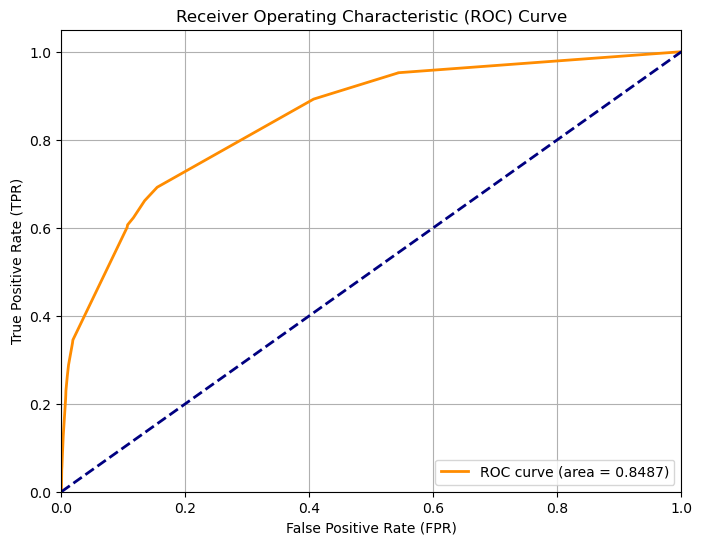

In [124]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. 테스트 데이터에 대한 예측 확률(positive 클래스에 대한 확률) 구하기
y_prob = bagging_model.predict_proba(X_test)[:, 1]

# 2. ROC 곡선에 필요한 값 계산 (FPR, TPR, threshold)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# 3. AUC 계산
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.4f}")

# 4. ROC Curve 시각화
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')  # 대각선 (랜덤 예측 기준)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## 4. 의사결정트리

In [63]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv('../../train_preprocessed.csv')

# 데이터 크기와 일부 확인
print(df.shape)
df.head()


(165034, 23)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,...,age_tenure_ratio,sleeping_wealth,minimal_user,economic_maturity,churn_risk_score,relationship_value,activity_per_year,financial_engagement,prime_age,wealth_per_product
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,True,...,8.250000,0,0,2993924.505,1,544349.91,1.5,2,0,90724.985
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,True,...,16.500000,0,0,816807.750,0,49503.50,0.5,3,0,24751.750
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,True,...,3.636364,0,0,3697333.800,1,1848666.90,5.0,2,1,92433.345
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,True,...,11.333333,0,1,3968538.140,0,169121.76,2.0,3,0,233443.420
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,True,...,5.500000,0,0,248635.695,0,75344.15,2.5,3,0,7534.415


In [64]:
# 타깃 변수 'Exited'를 분리하고 나머지는 특징 변수로 사용
X = df.drop('Exited', axis=1)
y = df['Exited']

print("특징 변수 형태:", X.shape)
print("타깃 변수 형태:", y.shape)


특징 변수 형태: (165034, 22)
타깃 변수 형태: (165034,)


In [65]:
from sklearn.model_selection import train_test_split

# 80% 학습, 20% 테스트, 클래스 비율 맞추기 위해 stratify=y 적용
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("학습 데이터 크기:", X_train.shape)
print("테스트 데이터 크기:", X_test.shape)


학습 데이터 크기: (132027, 22)
테스트 데이터 크기: (33007, 22)


## 분할속성 선택 기준 gini로 하고싶으면 entropy만 gini로 바꿔주면 됨

In [66]:
from sklearn.tree import DecisionTreeClassifier

# 의사결정나무 생성
tree = DecisionTreeClassifier(criterion='entropy',  # 정보이득 기준
                             max_depth=3,          # 최대 깊이 3으로 제한. 더 깊어지면 정확도는 높아지지만 복
                             random_state=42)

# 학습
tree.fit(X_train, y_train)

print("의사결정나무 모델 학습 완료!")


의사결정나무 모델 학습 완료!


In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 테스트 데이터 예측
y_pred = tree.predict(X_test)

# 평가 지표 출력
accuracy = accuracy_score(y_test, y_pred)
print(f"테스트 정확도: {accuracy:.4f}")

print("혼동 행렬:\n", confusion_matrix(y_test, y_pred))
print("분류 보고서:\n", classification_report(y_test, y_pred))


테스트 정확도: 0.8474
혼동 행렬:
 [[25523   500]
 [ 4537  2447]]
분류 보고서:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91     26023
           1       0.83      0.35      0.49      6984

    accuracy                           0.85     33007
   macro avg       0.84      0.67      0.70     33007
weighted avg       0.85      0.85      0.82     33007



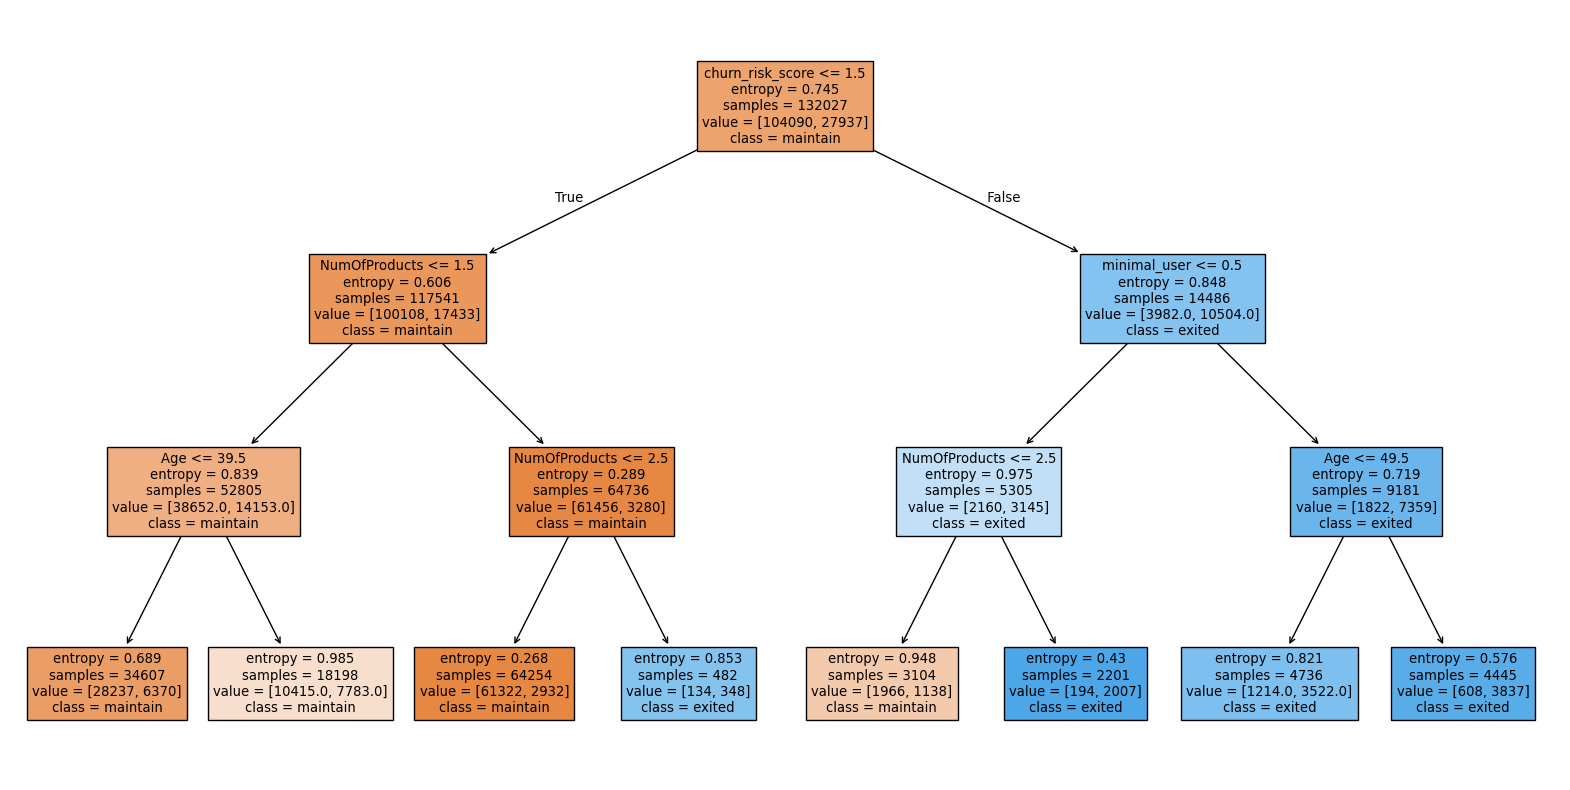

In [70]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(tree, filled=True,
          feature_names=X.columns,
          class_names=['maintain', 'exited'])
plt.show()
